In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

In [3]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data[:, 2:]
y = data.target

feature_names = data.feature_names[2:]
feature_names

['petal length (cm)', 'petal width (cm)']

In [4]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=808)
tree1.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=808)

In [5]:
def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(decision_tree=model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

def plot_decision_region(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.8, c=[cmap(idx)], marker=markers[idx], s=80, label=cl)
        
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

## Depth 1

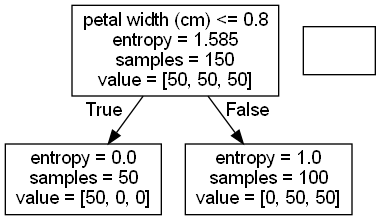

In [6]:
draw_decision_tree(tree1)

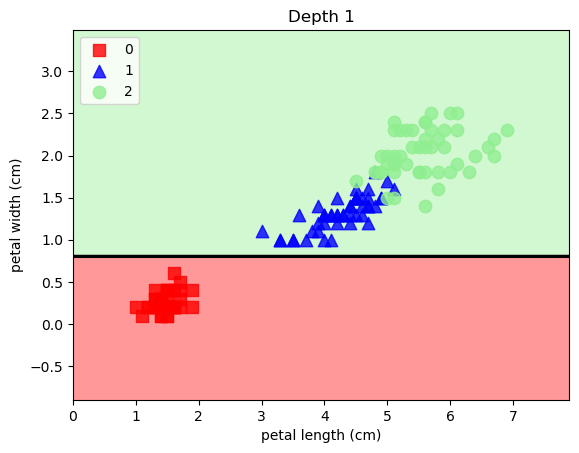

In [7]:
plot_decision_region(X, y, tree1, 'Depth 1')
plt.show()

In [8]:
confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]], dtype=int64)

## Depth 2

In [9]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=808)
tree2.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=808)

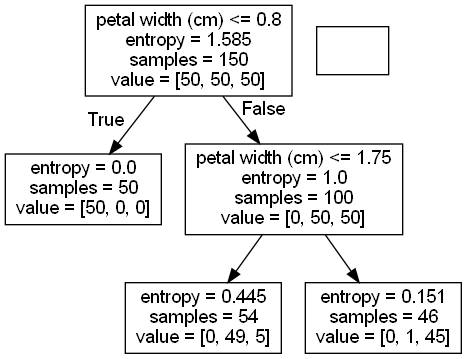

In [10]:
draw_decision_tree(tree2)

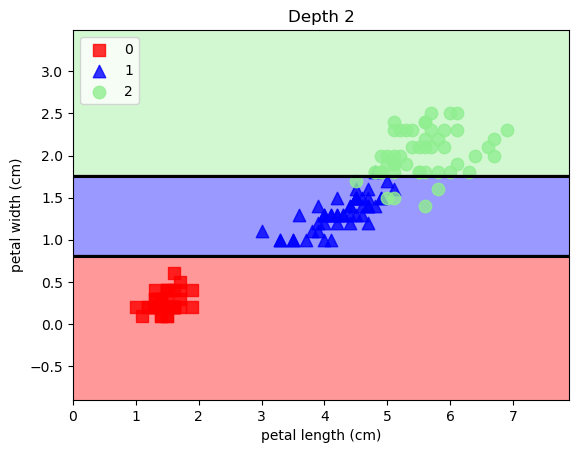

In [11]:
plot_decision_region(X, y, tree2, 'Depth 2')
plt.show()

In [12]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

## Depth 3

In [13]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=808)
tree3.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=808)

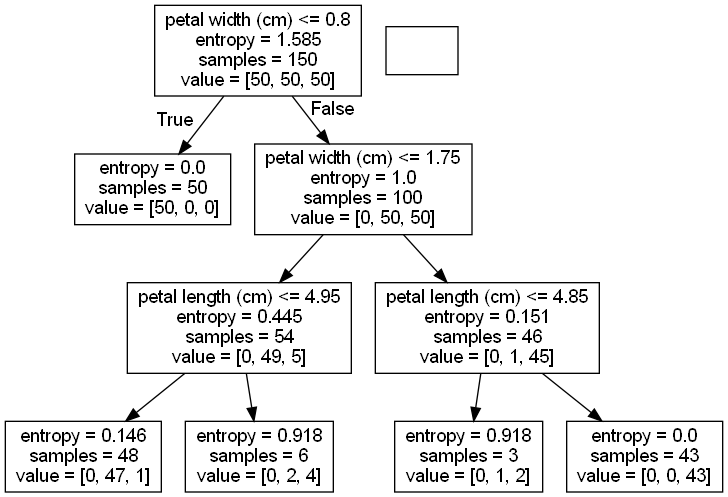

In [14]:
draw_decision_tree(tree3)

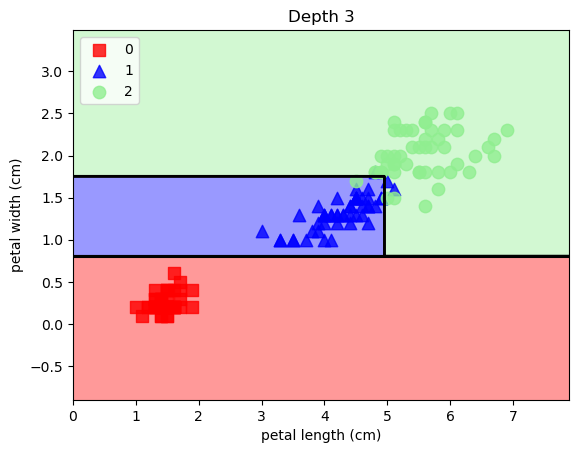

In [15]:
plot_decision_region(X, y, tree3, 'Depth 3')
plt.show()

In [16]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

## Depth 4

In [17]:
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=808)
tree4.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=808)

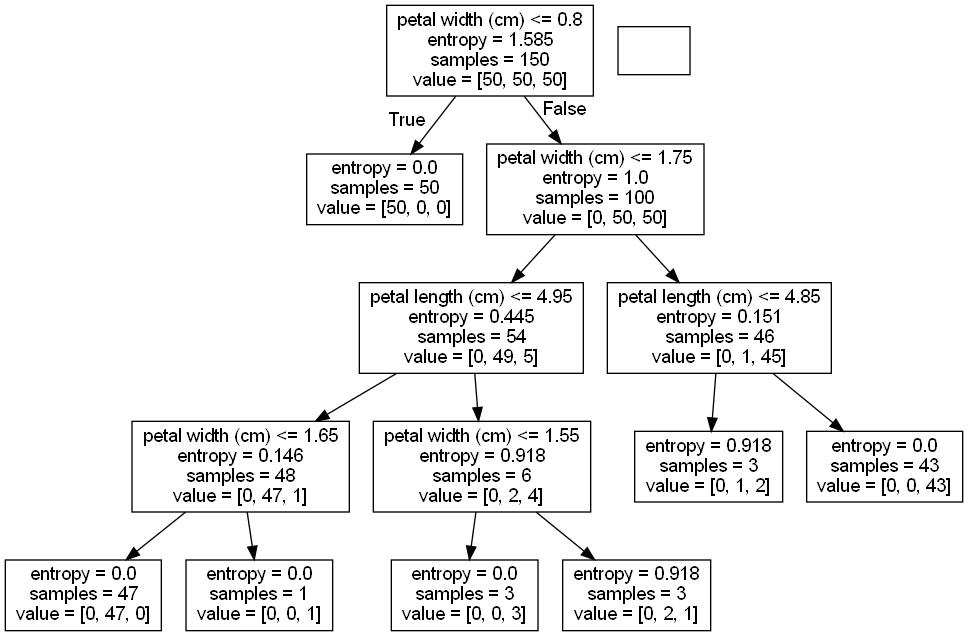

In [18]:
draw_decision_tree(tree4)

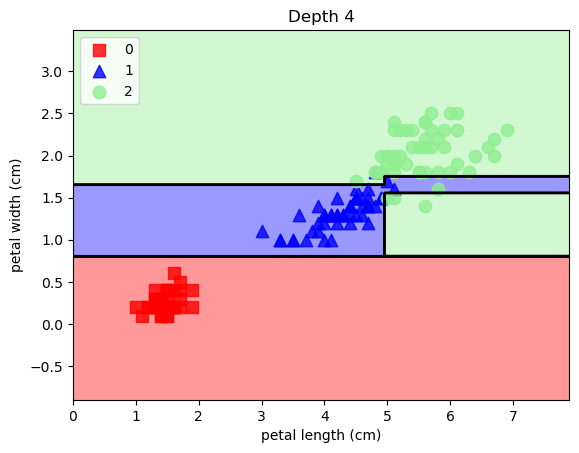

In [19]:
plot_decision_region(X, y, tree4, 'Depth 4')
plt.show()

In [20]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

## Depth 5

In [21]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=808)
tree5.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=808)

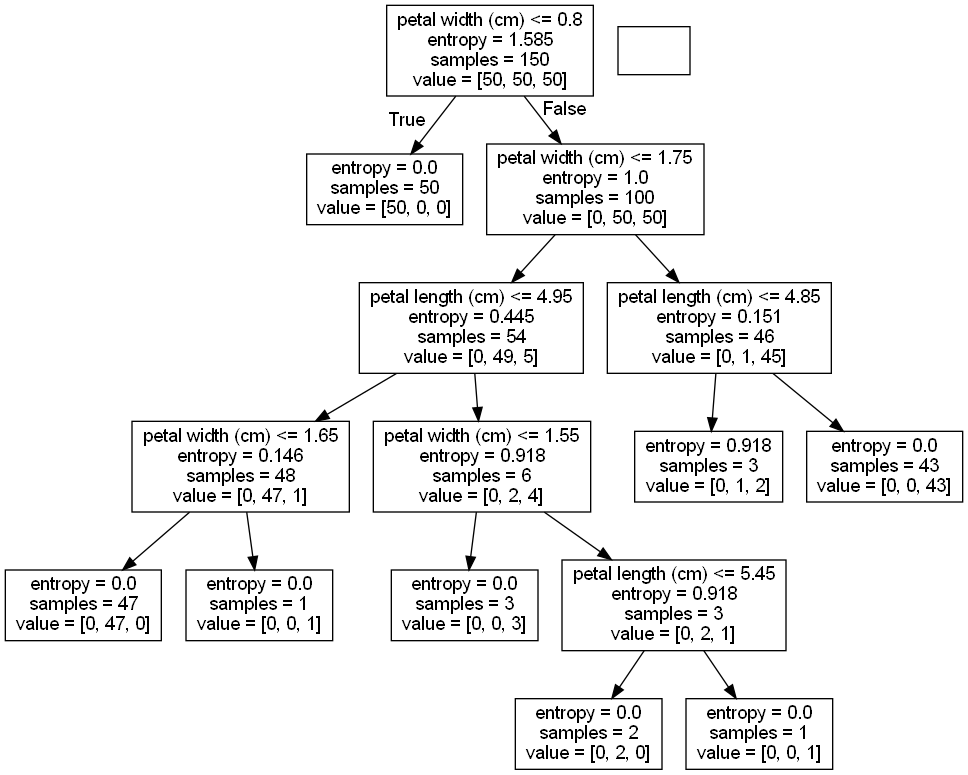

In [22]:
draw_decision_tree(tree5)

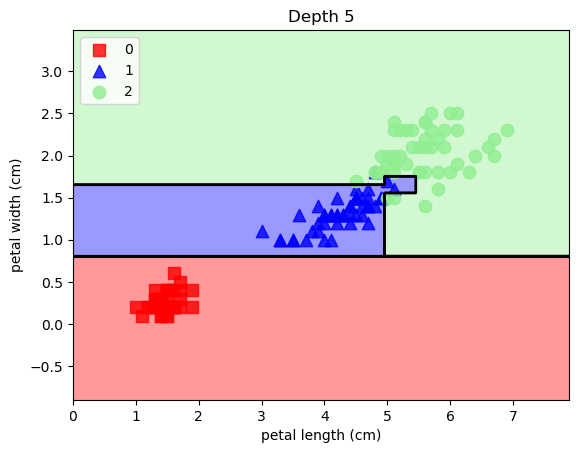

In [23]:
plot_decision_region(X, y, tree5, 'Depth 5')
plt.show()

In [24]:
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)